<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary" data-toc-modified-id="Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning – Energy Systems Course at University of Calgary</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Generate-Synthetic-Data-(Moons-Dataset)" data-toc-modified-id="Generate-Synthetic-Data-(Moons-Dataset)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate Synthetic Data (Moons Dataset)</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Root-Node-(Start)" data-toc-modified-id="Root-Node-(Start)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Root Node (Start)</a></span></li><li><span><a href="#Depth-1:-Left-Child-Node" data-toc-modified-id="Depth-1:-Left-Child-Node-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Depth 1: Left Child Node</a></span><ul class="toc-item"><li><span><a href="#Depth-1:-Left-Leaf-Node" data-toc-modified-id="Depth-1:-Left-Leaf-Node-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Depth 1: Left Leaf Node</a></span></li><li><span><a href="#Depth-1:-Right-Leaf-Node" data-toc-modified-id="Depth-1:-Right-Leaf-Node-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Depth 1: Right Leaf Node</a></span></li></ul></li><li><span><a href="#Depth-2:-Right-Child-Node" data-toc-modified-id="Depth-2:-Right-Child-Node-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Depth 2: Right Child Node</a></span><ul class="toc-item"><li><span><a href="#Depth-2:-Left-Leaf-Node" data-toc-modified-id="Depth-2:-Left-Leaf-Node-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Depth 2: Left Leaf Node</a></span></li><li><span><a href="#Depth-2:-Right-Leaf-Node" data-toc-modified-id="Depth-2:-Right-Leaf-Node-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Depth 2: Right Leaf Node</a></span></li></ul></li></ul></li><li><span><a href="#Regularization-Hyperparameters" data-toc-modified-id="Regularization-Hyperparameters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regularization Hyperparameters</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Limitation-of-Decision-Trees" data-toc-modified-id="Limitation-of-Decision-Trees-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Limitation of Decision Trees</a></span></li><li><span><a href="#Energy-Efficiency-Data-Set" data-toc-modified-id="Energy-Efficiency-Data-Set-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Energy Efficiency Data Set</a></span></li><li><span><a href="#Fine-Tune-Your-Model" data-toc-modified-id="Fine-Tune-Your-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Fine-Tune Your Model</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Randomized-Search" data-toc-modified-id="Randomized-Search-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Randomized Search</a></span></li></ul></li></ul></div>

# Machine Learning – Energy Systems Course at University of Calgary

* Instructor: [Mehdi Rezvandehy](https://www.linkedin.com/in/mehdi-rezvandehy-ph-d-70a40b52/)

# Decision Trees


We talked abut SVMs which is an flexible algorithms to perform both classification and regression. Decision Trees is also a powerful algorithms that can be applied for both classification and regression tasks. Decision Trees is among the most versatile and reliable machine learning algorithms for non-linear and complex data. Decision Trees is the fundamental component of Random Forest that will be discussed next lecture. Decision Trees is applied based on a flowchart structure. 
We start by generating a synthetic example with two classes; details about training, prediction and limitation of this technique are presented.

# Generate Synthetic Data (Moons Dataset)

The following code shows how to generate a synthetic data set using [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) that makes two interleaving half circles:

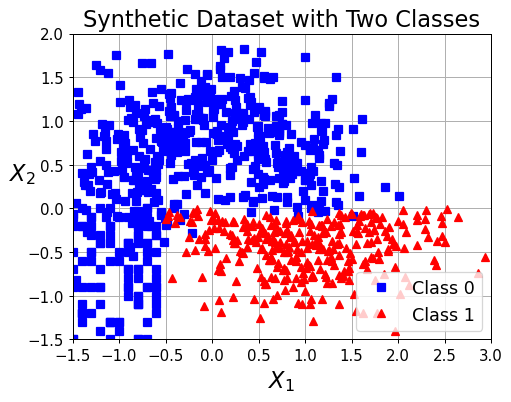

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import pylab as plt
from numpy import random
from sklearn.datasets import make_moons


font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(6.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

X, y = make_moons(n_samples=1000, noise=0.42, random_state=85)
X1=X[:,0] ; X2=X[:,1]
ik=0; ind=[]
for j in X2:
    if(y[ik]==0):
        if X1[ik]<-0.2:
            ind.append(ik)
        elif(j>-0.1):
            ind.append(ik)
    elif(y[ik]==1):
        if(j<-0.0):
            ind.append(ik)        
    ik+=1

X1=X1[ind] ; X2=X2[ind]; y=y[ind]

random.seed(42)
x_1=random.randint(-15,-5,100)/10
x_2=random.randint(-15,1,100)/10
y_1=random.randint(0,1,100)

X1=np.concatenate((X1,x_1),axis=0)
X2=np.concatenate((X2,x_2),axis=0)
y=np.concatenate((y,y_1),axis=0)
def moon_dataset(X1,X2, y, axes):
    plt.plot(X1[y==0], X2[y==0], "bs", label="Class 0")
    plt.plot(X1[y==1], X2[y==1], "r^", label="Class 1")
    plt.xlabel(r"$X_{1}$", fontsize=18)
    plt.ylabel(r"$X_{2}$", fontsize=18, rotation=0)
    plt.grid(True, which='both')
    plt.axis(axes)
    plt.legend(loc="lower right", fontsize=14)

moon_dataset(X1,X2, y, [-1.5, 3, -1.5, 2])

plt.title('Synthetic Dataset with Two Classes', fontsize=18)

a=np.array(X1)
b=np.array(X2)
a=a.reshape(len(X1),1)
b=b.reshape(len(X2),1)
X=np.concatenate((a,b),axis=1)

plt.show()

# Decision Trees 

A Decision Trees model is trained with the moon dataset using *DecisionTreeClassifier* 

In [2]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42) 
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [3]:
# Predict the fist 5 instances
tree_clf.predict(X[:5])

array([1, 0, 1, 0, 1], dtype=int64)

In [4]:
# The actual 5 instances
y[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [5]:
from sklearn.model_selection import cross_val_score

Accuracies=cross_val_score(tree_clf,X,y, cv=4, scoring="accuracy")
Accuracies

array([0.98181818, 0.97260274, 0.98173516, 0.99086758])

The trained Decision Tree can be visualized by first using the export_graphviz() method to output a graph definition file **DecisionTrees.dot** and use the "dot -Tps DecisionTrees.dot -o DecisionTrees.eps" to convert dot file to a eps picture. See the following code.

In [6]:
# Plot Decision Trees for flow chart

from sklearn.tree import export_graphviz
import os

export_graphviz(tree_clf,out_file="./Data/DecisionTrees.dot",
                feature_names=['X1','X2'],
                class_names=['0','1'],rounded=True,filled=True)

command = "dot -Tps DecisionTrees.dot -o ./Data/DecisionTrees.eps" 
os.system(command)
plt.show()

The Figure below shows visualization for trained Decision Tree with moon dataset.

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig8-1-1.png " alt="drawing" width="950"/>

## Root Node (Start)

Let’s see how the tree represented in Figure above makes predictions. We start at the Root Node (Depth 0): this node asks whether the $X\leqslant-0.045$. If it is, then you move down to the root’s left **Child Node** (Depth 1). If not, it goes to the root’s right child node (Depth 1). A **Leaf Node** does not have any children nodes, so it does not ask any questions (see left and right Leaf Nodes in Figure above). 


For each node, *gini* attribute measures the impurity: a node is “pure” (gini=0) if we have all the training instances belong to the same class. 

The equation below shows how to compute the gini score:

$gini=1-\sum_{k=1}^{n} P_{k}^{2}$

$P_{k}$ is the ratio of class k instances among the training instances for each node. For example the gini score for the Root Node (Depth 0) is $1-(\frac{575}{877})^{2}-(\frac{302}{877})^{2}=0.452$

The gini reduces from Root Node to Leaf Node, so the predicted class is based on Leaf Node. The following codes shows how to calculate gini for each node:

In [7]:
X_p=X.reshape(len(X1),2)
y_p=y.reshape(len(y),1)
x=np.concatenate((X_p,y_p),axis=1)
df=pd.DataFrame(x,columns=['X1','X2','y'])
df

,X1,X2,y
0,2.200372,-0.415267,1.0
1,-0.992773,1.414216,0.0
2,0.960662,-0.496930,1.0
3,-0.440320,0.611729,0.0
4,0.873005,-0.905923,1.0
...,...,...,...
872,-0.600000,-0.800000,0.0
873,-0.700000,-0.500000,0.0
874,-0.900000,-0.700000,0.0
875,-0.700000,-0.200000,0.0


In [8]:
def gini(x):
    val=1-sum([(i/sum(x))**2 for i in x])      
    return np.round(val,3)

In [9]:
Result=df['y'].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 877
gini= 0.452
0.0    575
1.0    302
Name: y, dtype: int64


## Depth 1: Left Child Node 

In [10]:
Result=df['y'][df['X2']<= -0.045].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 415
gini= 0.409
1.0    296
0.0    119
Name: y, dtype: int64


### Depth 1: Left Leaf Node

In [11]:
Result=df['y'][df['X2']<= -0.045][df['X1']<= -0.497].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 113
gini= 0.0
0.0    113
Name: y, dtype: int64


### Depth 1: Right Leaf Node 

In [12]:
Result=df['y'][df['X2']<= -0.045][df['X1']> -0.497].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 302
gini= 0.039
1.0    296
0.0      6
Name: y, dtype: int64


## Depth 2: Right Child Node

In [13]:
Result=df['y'][df['X2']> -0.045].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 462
gini= 0.026
0.0    456
1.0      6
Name: y, dtype: int64


### Depth 2: Left Leaf Node

In [14]:
Result=df['y'][df['X2']> -0.045][df['X1']<= 2.034].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 459
gini= 0.013
0.0    456
1.0      3
Name: y, dtype: int64


### Depth 2: Right Leaf Node 

In [15]:
Result=df['y'][df['X2']> -0.045][df['X1']> 2.034].value_counts()
print('Total numbers=',sum(Result))
print('gini=',gini(Result)) 
print(Result)

Total numbers= 3
gini= 0.0
1.0    3
Name: y, dtype: int64


Figure below shows Decision Tree’s decision boundaries. The decision boundaries for depth=0 (the root node) is X2<= -0.045, for depth=1 is X1<= -0.497 and for depth=2 is X1<= 2.034.

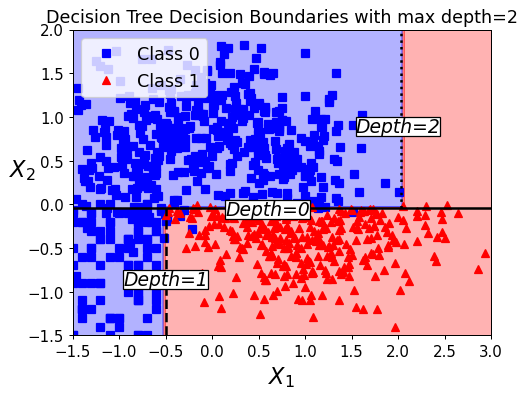

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt

font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(6.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

x1s = np.linspace(-1.8,3, 100)
x2s = np.linspace(-1.5,2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")
    
plt.axis([-1.5, 3, -1.5, 2])
plt.xlabel(r"$X_{1}$", fontsize=18)
plt.ylabel(r"$X_{2}$", fontsize=18, rotation=0)
plt.plot([-1.5, 3], [-0.045, -0.045], "k-", linewidth=2)
plt.text(0.6, 0.05, "Depth=0",style='oblique', ha='center',
         bbox=dict(facecolor='w', alpha=1,pad=0),
         va='top', wrap=True, fontsize=15)
#
plt.plot([-0.497, -0.497], [-1.5, -0.045], "k--", linewidth=2)
plt.text(-0.5, -0.75, "Depth=1",style='oblique', ha='center',
         bbox=dict(facecolor='w', alpha=1,pad=0),
         va='top', wrap=True, fontsize=15)
#
plt.plot([2.034, 2.034], [-0.045, 2.0], "k:", linewidth=2)
plt.text(2, 1, "Depth=2",style='oblique', ha='center',
         bbox=dict(facecolor='w', alpha=1,pad=0),
         va='top', wrap=True, fontsize=15)
plt.title('Decision Tree Decision Boundaries with max depth=2', fontsize=14)
plt.legend(loc=2, fontsize=14)
plt.show()

# Regularization Hyperparameters

We saw in the Machine Learning main steps lecture that Decision Trees has greatly overfitted the training set. It was because all parameters have been freely selected. Decision Tree’s freedom can be restricted to avoid overfitting. As we mentioned before, this is called **regularization**. In Scikit-Learn, this is controlled by the *max_depth* hyperparameter (the default value for *max_depth* is unlimited). Reducing max_depth will reduce the risk of overfitting. Another hyperparameters are *min_samples_leaf* (the minimum number of samples a leaf node must have), *max_leaf_nodes* (maximum number of leaf nodes)... Reducing max_ or increasing min_ regularizes the model.

The Figure belows shows an overfitted model for max_depth=20 in left. In right Figure, we still have max_depth=20 but restrict min_samples_leaf to 5. This leads to avoid overfitting.

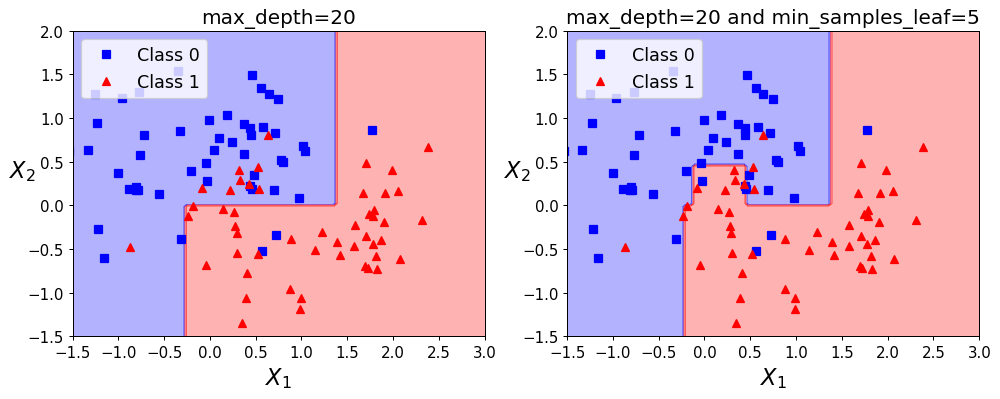

In [17]:
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(13.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
X, y = make_moons(n_samples=100, noise=0.42, random_state=85)

x1s = np.linspace(-1.8,3, 100)
x2s = np.linspace(-1.5,2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
np.random.seed(42) 
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")
    
plt.axis([-1.5, 3, -1.5, 2])
plt.xlabel(r"$X_{1}$", fontsize=18)
plt.ylabel(r"$X_{2}$", fontsize=18, rotation=0)
plt.title("max_depth=20", fontsize=16)
plt.legend(loc=2, fontsize=14)

ax2=plt.subplot(1,2,2) 

# Decision Trees
np.random.seed(42) 
tree_clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=5)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")
    
plt.axis([-1.5, 3, -1.5, 2])
plt.xlabel(r"$X_{1}$", fontsize=18)
plt.ylabel(r"$X_{2}$", fontsize=18, rotation=0)
plt.title("max_depth=20 and min_samples_leaf=5", fontsize=16)
plt.legend(loc=2, fontsize=14)

plt.show()

# Regression

Decision Trees can also be applied for regression task as we saw in Lecture 3 (for hydrocarbone production). Let’s build a regression tree for a synthetic data using Scikit-Learn’s DecisionTreeRegressor. 

In [18]:
# Quadratic training set + noise
np.random.seed(52)
n = 100
X = np.random.rand(n, 1)
y =  10-(X-0.5) **2
y = y + np.random.randn(n, 1) / 15

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

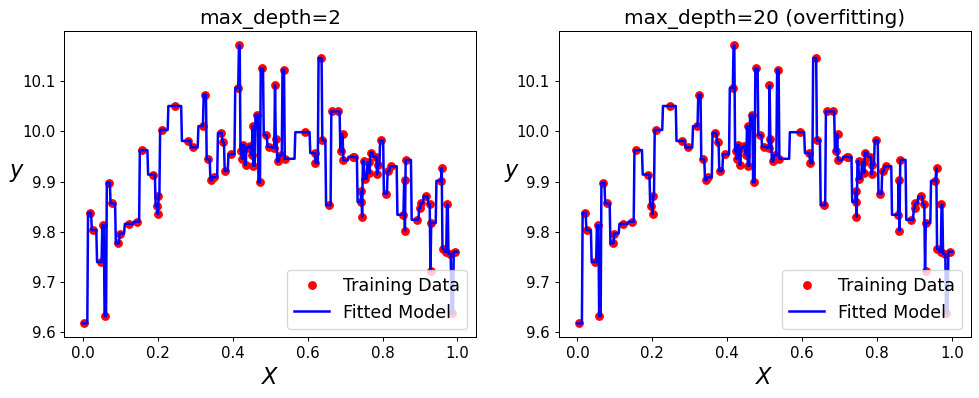

In [20]:
from sklearn.tree import DecisionTreeRegressor

font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(13.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
reg_tree1 = DecisionTreeRegressor(random_state=20)
reg_tree1.fit(X, y)
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = reg_tree1.predict(x1)

plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=2, label='Fitted Model')
plt.title("max_depth=2", fontsize=16)
plt.legend(loc=4, fontsize=14)

ax2=plt.subplot(1,2,2) 
reg_tree2 = DecisionTreeRegressor(random_state=20, max_depth=20)
reg_tree2.fit(X, y)
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = reg_tree2.predict(x1)

plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=2, label='Fitted Model')
plt.legend(loc=4, fontsize=14)
plt.title("max_depth=20 (overfitting)", fontsize=16)

plt.show()

# Limitation of Decision Trees

We saw Decision Trees algorithm is simple, easy to use, and powerful. However, like every technique it has limitations. Decision Trees has orthogonal decision boundaries, which makes it difficult to fit training sets which require rotation. For example, the following code shows training Decision Trees model for synthetic orthogonal data in left and for 45° rotated training set in right. It seems both Decision Trees fit the training set well; but the model on the right does not generalize well. 

In [21]:
np.random.seed(20)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

In [22]:
def rotate(x0,y0,x,y,Ang):
    """Rotate coordinate"""
    import math
    xa=[]      
    ya=[] 
    Angle=Ang *(math.pi/180)
    for i in range(len(x)):
        tmp1=x[i]-x0
        tmp2=y[i]-y0
        X=(tmp2)*math.sin(Angle)+(tmp1)*math.cos(Angle)
        xa.append(X+x0)
        Y=(tmp2)*math.cos(Angle)-(tmp1)*math.sin(Angle)
        ya.append(Y+y0) 
    xa=np.array(xa).reshape(len(xa),1)
    ya=np.array(ya).reshape(len(ya),1)    
    X=np.concatenate((xa,ya),axis=1)   
    return X   

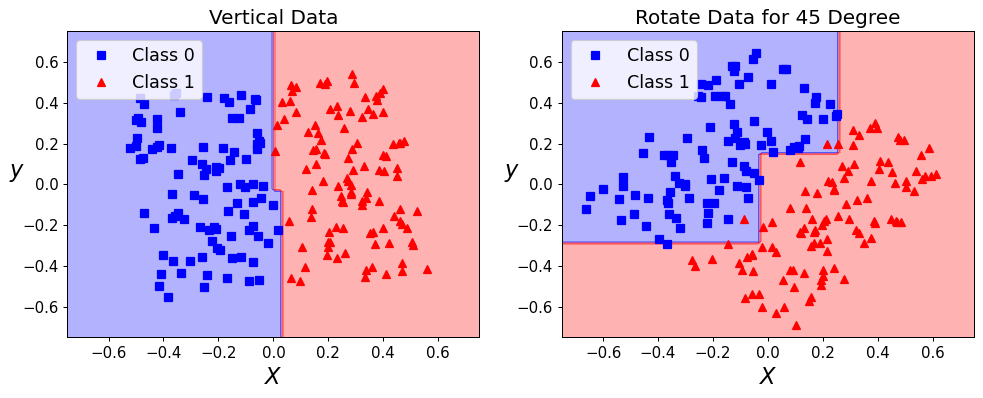

In [23]:
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(13.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

np.random.seed(20)
X = np.random.rand(200, 2) - 0.5
y = np.array([1 if i > 0 else 0 for i in list(X[:, 0])])

ax1=plt.subplot(1,2,1) 
X=rotate(0,0,X[:, 0],X[:, 1],-8)
x1s = np.linspace(-0.75,0.75, 100)
x2s = np.linspace(-0.75,0.75, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
np.random.seed(62)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")
    
plt.xlabel(r"$X$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.title("Vertical Data", fontsize=16)
plt.legend(loc=2, fontsize=14)

ax2=plt.subplot(1,2,2) 
X=rotate(0,0,X[:, 0],X[:, 1],45)
np.random.seed(62) 
tree_clf = DecisionTreeClassifier(min_samples_leaf=3)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")

plt.xlabel(r"$X$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.title("Rotate Data for 45 Degree", fontsize=16)
plt.legend(loc=2, fontsize=14)
plt.show()

# Energy Efficiency Data Set 

In [24]:
import pandas as pd

df = pd.read_csv('./Data/Building_Heating_Load.csv',na_values=['NA','?',' '])
df[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Binary Classes,Multi-Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Low Level,Level 2
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Low Level,Level 2
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Low Level,Level 2
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Low Level,Level 2
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Low Level,Level 2


In [25]:
df_binary=df.copy()
df_binary.drop(['Heating Load','Multi-Classes'], axis=1, inplace=True)
df_binary[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Binary Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Low Level
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Low Level
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Low Level
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Low Level
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Low Level


In [26]:
df_binary['Binary Classes']=df_binary['Binary Classes'].replace('Low Level', 0)
df_binary['Binary Classes']=df_binary['Binary Classes'].replace('High Level', 1)
df_binary[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Binary Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0


In [27]:
import numpy as np

np.random.seed(32) 
df_binary=df_binary.reindex(np.random.permutation(df_binary.index))
df_binary.reset_index(inplace=True, drop=True)
df_binary[0:10]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Binary Classes
0,0.79,637.0,343.0,147.00,7.0,4,0.40,3,1
1,0.76,661.5,416.5,122.50,7.0,5,0.40,4,1
2,0.76,661.5,416.5,122.50,7.0,3,0.25,4,1
3,0.66,759.5,318.5,220.50,3.5,3,0.40,1,0
4,0.98,514.5,294.0,110.25,7.0,5,0.10,2,0
5,0.79,637.0,343.0,147.00,7.0,3,0.25,2,1
6,0.79,637.0,343.0,147.00,7.0,2,0.40,2,1
7,0.64,784.0,343.0,220.50,3.5,3,0.00,0,0
8,0.62,808.5,367.5,220.50,3.5,4,0.10,4,0
9,0.71,710.5,269.5,220.50,3.5,4,0.10,3,0


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spt.split(df_binary, df_binary['Binary Classes']):
    train_set_strat = df_binary.loc[train_idx]
    test_set_strat  = df_binary.loc[test_idx]  

In [29]:
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("Binary Classes", axis=1)
y_train = train_set_strat["Binary Classes"].values

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=X_train.copy()
X_train_Std=scaler.fit_transform(X_train)
# Traning Data
X_train_Std[0:5]

array([[ 2.00399847, -1.76197447, -0.55654271, -1.45169996,  1.        ,
        -0.45187215, -1.76353776, -1.81691156],
       [-0.05065135, -0.10607805,  2.23983391, -1.18233043,  1.        ,
        -1.34399272,  0.10919172,  0.7669534 ],
       [-0.05065135, -0.10607805,  2.23983391, -1.18233043,  1.        ,
         0.44024843, -1.01444597, -0.52497908],
       [ 0.88328039, -0.93402626, -0.55654271, -0.64359137,  1.        ,
        -1.34399272,  0.10919172,  0.7669534 ],
       [-0.98458308,  0.99785289,  0.00273262,  0.97262581, -1.        ,
         0.44024843, -1.01444597,  0.12098716]])

In [31]:
np.random.seed(42) 
tree_clf = DecisionTreeClassifier(max_depth=10,min_samples_split=5,min_samples_leaf=4)
tree_clf.fit(X_train_Std, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [32]:
from sklearn.model_selection import cross_val_score

Accuracies=cross_val_score(tree_clf,X_train_Std, y_train, cv=4, scoring="accuracy")
Accuracies

array([0.93506494, 0.9025974 , 0.96732026, 0.96732026])

In [33]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(tree_clf,X_train_Std,y_train, cv=4)

In [34]:
from sklearn.metrics import precision_score, recall_score

precision=precision_score(y_train, y_train_pred)
print('Precision= ',precision)

recall=recall_score(y_train, y_train_pred)
print('Recall (sensitivity)= ',recall)

Precision=  0.8728813559322034
Recall (sensitivity)=  0.8373983739837398


# Fine-Tune Your Model

Lets fine-tune hyperparameters of Descicion Trees *max_depth*,*min_samples_leaf*... with *Scikit-Learn’ Grid Search* and *Randomized Search* discussed in previous lecture. 

## Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
tree_clf = DecisionTreeClassifier()    
params = {'max_depth': [2,5,10,20,30,40],'max_features': [2,3,4,5],'min_samples_leaf': [2,3,5,7]}

tree_search_cv = GridSearchCV(tree_clf, params, cv=5,scoring='recall') 
tree_search_cv.fit(X_train,y_train)
tree_search_cv.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 5}

In [36]:
tree_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5)

In [37]:
cvreslt=tree_search_cv.cv_results_
cvreslt_params=[str(i) for i in cvreslt["params"]]
for mean_score, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.sqrt(mean_score), params)

0.5582711408148076 {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 7}
0.6387487769068525 {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 5}
0.7496665925596524 {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 5}
0.7549834435270749 {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 3}
0.7912016177940993 {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 3}
0.7962411694957753 {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 7}
0.8062257748298549 {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 7}
0.8209750300709516 {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 5}
0.840238061504 {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 2}
0.840238061504 {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 3}
0.840238061504 {'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 2}
0.840238061504 {'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 3}
0.840238061504 {'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 5}
0.8402

## Randomized Search

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tree_clf = DecisionTreeClassifier()    
params = {'max_depth': randint(low=2, high=30),'min_samples_leaf': randint(low=2, high=10)}

tree_search_cv = RandomizedSearchCV(tree_clf, params,n_iter=50, cv=5,scoring='recall') 
tree_search_cv.fit(X_train,y_train)
tree_search_cv.best_params_

{'max_depth': 13, 'min_samples_leaf': 2}

In [39]:
cvreslt=tree_search_cv.cv_results_
cvreslt_params=[str(i) for i in cvreslt["params"]]
for mean_score, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.sqrt(mean_score), params)

0.840238061504 {'max_depth': 2, 'min_samples_leaf': 5}
0.840238061504 {'max_depth': 3, 'min_samples_leaf': 5}
0.910494371207203 {'max_depth': 11, 'min_samples_leaf': 9}
0.910494371207203 {'max_depth': 12, 'min_samples_leaf': 9}
0.910494371207203 {'max_depth': 19, 'min_samples_leaf': 9}
0.910494371207203 {'max_depth': 27, 'min_samples_leaf': 4}
0.910494371207203 {'max_depth': 9, 'min_samples_leaf': 9}
0.9146948489341495 {'max_depth': 11, 'min_samples_leaf': 7}
0.9146948489341495 {'max_depth': 22, 'min_samples_leaf': 8}
0.9146948489341495 {'max_depth': 27, 'min_samples_leaf': 7}
0.9146948489341495 {'max_depth': 28, 'min_samples_leaf': 8}
0.9146948489341495 {'max_depth': 29, 'min_samples_leaf': 6}
0.9148770409186143 {'max_depth': 16, 'min_samples_leaf': 4}
0.9148770409186143 {'max_depth': 18, 'min_samples_leaf': 4}
0.9148770409186143 {'max_depth': 24, 'min_samples_leaf': 4}
0.9148770409186143 {'max_depth': 6, 'min_samples_leaf': 4}
0.9148770409186143 {'max_depth': 7, 'min_samples_leaf': 3